# Collect Data From Twitter During Barcelona vs Atletico Madrid, the second leg of Champions League Quarter-final


In this page, I collected a dataset of tweets created during a football match by **Twitter API**. To be exact, the tweets are downloaded through **Tweepy**, an easy-to-use Python library for accessing the Twitter API.

The football macth is the second leg of Champions League Quarter-final, Barcelona vs Atletico Madrid, which took place on Wednesday, April 13, 7:45 PM. Atletico Madrid won the game with a 2-0 result. Griezmann scored twice at 36' and 88' pen.

I collected all the tweets containing the string #AtletiFCB and the time frame for download is from 7:00PM to 8:45PM in Spain time, which is from about 15 minutes after the game' start(I expected to capture the data before the game started, but I got a wrong time), to about 15 minutes after the end of the game. During this time, **82,823 tweets** were collected in JSON format and stored in a file called 'AtletiFCB.json', making for about **400Mb** of data.

## Collect Data From Twitter
The following code is used for download the tweets with '**#AtletiFCB**' into AtletiFCB.json:

In [ ]:
import tweepy

consumer_key = ""
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

from tweepy import Stream
from tweepy.streaming import StreamListener
 
class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            # I set the file format as .json 
            # because it's too large and I can't open it with my editor in other formats like .txt
            with open('AtletiFCB.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True

twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['#AtletiFCB'])

### clean the Twitter API limition information and space lines
The data in  AtletiFCB.json has many space lines and nosiy data produced by Twitter API, like:  
***{"limit":{"track":100,"timestamp_ms":"1460575364010"}}***  
So I firstly clean them and stored the data into a new file before I represent.


In [2]:
import json

real_tweets = []
with open('AtletiFCB.json', 'r') as f:
    for line in f:
        line = line.strip()
        # select the lines with 'text' attribute, which is a tweet not limition information
        if line and 'text' in line:
            tweet = json.loads(line)
            real_tweets.append(tweet)
# write the data into tweets.json in a json format
with open("tweets.json", "w") as fout:
    s = json.dumps(real_tweets)
    fout.write(s)

## Load And Represent The Data

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import bigrams 
import re
import string
import pandas as pd
import json
from collections import Counter
 

with open('tweets.json', 'r') as f:
    s = f.read()
tweets = json.loads(s)

df = pd.read_json("tweets.json")
print(df.shape)
df.head()

(81587, 32)


,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,filter_level,geo,id,...,quoted_status_id_str,retweet_count,retweeted,retweeted_status,scopes,source,text,timestamp_ms,truncated,user
0,NaN,None,2016-04-13 19:03:15,"{'symbols': [], 'hashtags': [{'text': 'AtletiF...",NaN,0,False,low,None,720326501523070978,...,NaN,0,False,"{'in_reply_to_user_id': None, 'text': '15: Qua...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @FCBarcelona: 15: Quarter of an hour gone -...,2016-04-13 19:03:15.639,False,"{'profile_sidebar_fill_color': 'DDEEF6', 'is_t..."
1,NaN,None,2016-04-13 19:03:16,"{'symbols': [], 'hashtags': [{'text': 'FCBlive...",NaN,0,False,low,None,720326503934861312,...,NaN,0,False,"{'in_reply_to_user_id': None, 'text': 'Minuto ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @FCBarcelona_es: Minuto 6: Atento Ter Stege...,2016-04-13 19:03:16.214,False,"{'profile_sidebar_fill_color': 'DDEEF6', 'is_t..."
2,NaN,None,2016-04-13 19:03:16,"{'symbols': [], 'hashtags': [{'text': 'AúpaAtl...","{'media': [{'type': 'photo', 'media_url': 'htt...",0,False,low,None,720326504463384576,...,NaN,0,False,{'extended_entities': {'media': [{'id': 720324...,NaN,"<a href=""http://twitter.com/download/android"" ...",RT @Atleti: ¡¡IMPRESIONANTE!! Así recibió el C...,2016-04-13 19:03:16.340,False,"{'profile_sidebar_fill_color': '000000', 'is_t..."
3,NaN,None,2016-04-13 19:03:16,"{'symbols': [], 'hashtags': [{'text': 'FCBLive...",NaN,0,False,low,None,720326504719257600,...,NaN,0,False,"{'in_reply_to_user_id': None, 'text': 'Min 15....",NaN,"<a href=""http://twitter.com/download/android"" ...",RT @fcbarcelona_br: Min 15. Duelo equilibrado ...,2016-04-13 19:03:16.401,False,"{'profile_sidebar_fill_color': 'DDEEF6', 'is_t..."
4,NaN,None,2016-04-13 19:03:16,"{'symbols': [], 'hashtags': [{'text': 'AtletiF...",NaN,0,False,low,None,720326505226768384,...,NaN,0,False,"{'in_reply_to_user_id': None, 'text': '15: Qua...",NaN,"<a href=""http://twitter.com/download/android"" ...",RT @FCBarcelona: 15: Quarter of an hour gone -...,2016-04-13 19:03:16.522,False,"{'profile_sidebar_fill_color': '000000', 'is_t..."



## Preprocess The Data

Many attributes of the tweet are null, so I check the attributes first and delete some attributes which are empty or not useful.

In [301]:
df.isnull().sum()

contributors                 81587
coordinates                  81465
created_at                       0
entities                         0
extended_entities            50700
favorite_count                   0
favorited                        0
filter_level                     0
geo                          81465
id                               0
id_str                           0
in_reply_to_screen_name      80492
in_reply_to_status_id        81119
in_reply_to_status_id_str    81119
in_reply_to_user_id          80492
in_reply_to_user_id_str      80492
is_quote_status                  0
lang                             0
place                        79158
possibly_sensitive           44609
quoted_status                78796
quoted_status_id             78796
quoted_status_id_str         78796
retweet_count                    0
retweeted                        0
retweeted_status             31641
scopes                       81580
source                           0
text                

 I drop the following featrues to get a cleaned and smaller dataset.  
 Although the coordinates, place and retweeted_status have many empty values, they can be used to represent data in later steps

In [4]:
drop = ['contributors','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id',
        'in_reply_to_user_id_str','geo','possibly_sensitive', 'quoted_status',
       'quoted_status_id','quoted_status_id_str','scopes','extended_entities']
clean_df = df.drop(drop, axis=1)
print(clean_df.shape)
clean_df.isnull().sum()

(81587, 19)


coordinates         81465
created_at              0
entities                0
favorite_count          0
favorited               0
filter_level            0
id                      0
id_str                  0
is_quote_status         0
lang                    0
place               79158
retweet_count           0
retweeted               0
retweeted_status    31641
source                  0
text                    0
timestamp_ms            0
truncated               0
user                    0
dtype: int64

After that, the data should look like the below:

In [304]:
clean_df.head()

,coordinates,created_at,entities,favorite_count,favorited,filter_level,id,id_str,is_quote_status,lang,place,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,None,2016-04-13 19:03:15,"{'hashtags': [{'indices': [120, 130], 'text': ...",0,False,low,720326501523070978,720326501523070976,False,en,None,0,False,"{'truncated': False, 'retweet_count': 17, 'is_...","<a href=""http://twitter.com/download/iphone"" r...",RT @FCBarcelona: 15: Quarter of an hour gone -...,2016-04-13 19:03:15.639,False,"{'protected': False, 'verified': False, 'follo..."
1,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [99, 107], 'text': '...",0,False,low,720326503934861312,720326503934861312,False,es,None,0,False,"{'truncated': False, 'retweet_count': 80, 'is_...","<a href=""http://twitter.com/download/iphone"" r...",RT @FCBarcelona_es: Minuto 6: Atento Ter Stege...,2016-04-13 19:03:16.214,False,"{'protected': False, 'verified': False, 'follo..."
2,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [93, 104], 'text': '...",0,False,low,720326504463384576,720326504463384576,False,es,None,0,False,"{'truncated': False, 'retweet_count': 557, 'is...","<a href=""http://twitter.com/download/android"" ...",RT @Atleti: ¡¡IMPRESIONANTE!! Así recibió el C...,2016-04-13 19:03:16.340,False,"{'protected': False, 'verified': False, 'follo..."
3,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [122, 130], 'text': ...",0,False,low,720326504719257600,720326504719257600,False,es,None,0,False,"{'truncated': False, 'retweet_count': 8, 'is_q...","<a href=""http://twitter.com/download/android"" ...",RT @fcbarcelona_br: Min 15. Duelo equilibrado ...,2016-04-13 19:03:16.401,False,"{'protected': False, 'verified': False, 'follo..."
4,None,2016-04-13 19:03:16,"{'hashtags': [{'indices': [120, 130], 'text': ...",0,False,low,720326505226768384,720326505226768384,False,en,None,0,False,"{'truncated': False, 'retweet_count': 18, 'is_...","<a href=""http://twitter.com/download/android"" ...",RT @FCBarcelona: 15: Quarter of an hour gone -...,2016-04-13 19:03:16.522,False,"{'protected': False, 'verified': False, 'follo..."


### proprecess the tweet text
The most important part of this dataset is the tweet text, so before I gernerate visualisations, I create another data frame to process and represent tweet text. The text and entities like mentions, hastags will be dig out. 

In [7]:
# -------------------- tweet text preprocessing functions -----------------------
from collections import Counter
# set the regex to preprocess the text of tweets
regex_str = [
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
#emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    return tokens

# -------------------- preprocess text for representing the frequency of English Terms -----------------------

# set the stopwords with punctuation and digits
# specially, I don't handle some special characters like '…' and some Spanish punctuations, 
# so I just add few of them into this stopwords
stop = stopwords.words('english') + stopwords.words('spanish')  + ['RT','via','…','0,','’'] 
stop += string.digits + string.punctuation

# select the tweets in English only to represent the frequency of the terms 
tweet_text_en = clean_df.loc[clean_df.lang == 'en']['text']
count_en = Counter()
for index,item in tweet_text_en.iteritems():
    tokens = preprocess(item)
    # Create a list with all the terms without stop words
    terms_all = [term for term in tokens if term not in stop]
    # Count terms only (no hashtags, no mentions)
    terms_only = [term for term in terms_all if  not term.startswith(('#', '@'))]
    # Update the counter
    count_en.update(terms_only)
    
# -------------------- preprocess text for representing the top 20 of hastags and mentions -----------------------

# select all tweets 
tweet_text = clean_df['text']
count_mentions = Counter()
count_hashtags = Counter()
for index,item in tweet_text.iteritems():
    tokens = preprocess(item)
    # Create a list with all the terms without stop words
    terms_all = [term for term in tokens if term not in stop]
    # Count hashtags only 
    hashtags_only = [term for term in terms_all if term.startswith(('#'))]
    # Count mentions only 
    mentions_only = [term for term in terms_all if term.startswith(('@'))]
    # Update the counter
    count_hashtags.update(hashtags_only)
    count_mentions.update(mentions_only)
    
# -------------------- preprocess text for representing the top 10 favorited and retweeted tweets -----------------------

#Separate the data into tweets and retweets
tweets = clean_df.loc[clean_df.retweeted_status.isnull()]
print(tweets.shape)
retweets = clean_df.loc[clean_df.retweeted_status.notnull()]
print(retweets.shape)

#create a data frame to load retweets data
retweeted_status = retweets['retweeted_status']

retweets_list = []
for retweeted_status,item in retweeted_status.iteritems():
    retweets_list.append(item)

retweets = pd.DataFrame(data=retweets_list)
# drop the duplicated tweets
retweets_clean = retweets.drop_duplicates(subset='id', keep = 'last')
print(retweets_clean.shape)
retweets_clean.head()

(31641, 19)
(49946, 19)
(5333, 30)


,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,filter_level,geo,id,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,scopes,source,text,truncated,user
6,None,None,Wed Apr 13 19:02:52 +0000 2016,"{'symbols': [], 'hashtags': [{'text': 'AtletiF...",NaN,0,False,low,None,720326403200167937,...,NaN,NaN,NaN,1,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",LE DRAPEAU DZ IL EST PARTOUT !!! 🇩🇿🇩🇿🇩🇿 #Atlet...,False,"{'profile_sidebar_fill_color': '000000', 'is_t..."
10,None,None,Wed Apr 13 18:51:22 +0000 2016,"{'symbols': [], 'hashtags': [{'text': 'NuncaDe...",NaN,0,False,low,None,720323509856153600,...,NaN,NaN,NaN,1,False,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",#NuncaDejesDeCreer #AtletiFCB 💪❤️,False,"{'profile_sidebar_fill_color': 'DDEEF6', 'is_t..."
44,None,None,Wed Apr 13 18:47:31 +0000 2016,"{'symbols': [], 'hashtags': [{'text': 'AtletiF...",NaN,3,False,low,None,720322540351201281,...,NaN,NaN,NaN,3,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Bon allez je me regarde un petit quart de LDC ...,False,"{'profile_sidebar_fill_color': 'DDEEF6', 'is_t..."
52,None,None,Wed Apr 13 19:01:26 +0000 2016,"{'symbols': [], 'hashtags': [{'text': 'AtletiF...",NaN,1,False,low,None,720326044679471104,...,NaN,NaN,NaN,1,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Barça only needs like 3-4 touches to create a ...,False,"{'profile_sidebar_fill_color': 'DDEEF6', 'is_t..."
76,None,None,Wed Apr 13 18:59:56 +0000 2016,"{'symbols': [], 'hashtags': [{'text': 'AupaAtl...",NaN,0,False,low,None,720325664474275841,...,NaN,NaN,NaN,1,False,NaN,"<a href=""http://twitter.com/download/android"" ...",#AupaAtleti #AtletiFCB ✊😤,False,"{'profile_sidebar_fill_color': 'DDEEF6', 'is_t..."


## Statistically Describe And Visualisations

Firstly, Let's check the timeline of the tweets created during the game, the 3 lines representing the tweets with '#AtletiFCB' or '@Atleti', '@FCBarcelona' :

81587


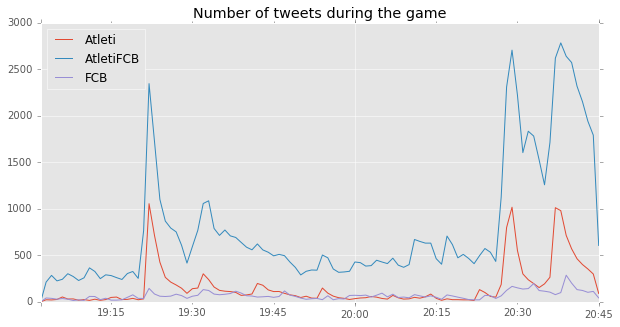

In [321]:
# still need to tell IPython to display plots within the notebook
%matplotlib inline
# this is not strictly necessary, it just improves the style of the Matplotlib plots
import matplotlib
matplotlib.style.use("ggplot")

timestamp= []
# a list of "1" or "0"to count the tweets
timestamp_AtletiFCB = []
timestamp_Atleti = []
timestamp_FCB = []

a = 0

for index,row in clean_df.iterrows():
    a += 1
    tweet_text = row['text']
    tweet_time = row['created_at']
    tokens = preprocess(tweet_text)
    terms_all = [term for term in tokens if term not in stop]

    timestamp.append(tweet_time)
    timestamp_AtletiFCB.append(1)

    if '@Atleti' in terms_all:
        timestamp_Atleti.append(1)
    else: 
        timestamp_Atleti.append(0)

    if '@FCBarcelona' in terms_all:
        timestamp_FCB.append(1)
    else:
        timestamp_FCB.append(0)
    
    
print(a)
# the index of the DataFrame
idx_AtletiFCB = pd.DatetimeIndex(timestamp)

all_data = dict(Atleti=timestamp_Atleti,AtletiFCB=timestamp_AtletiFCB,FCB=timestamp_FCB)

AtletiFCB = pd.DataFrame(data=all_data, index=idx_AtletiFCB)
#  Resampling
AtletiFCB =  AtletiFCB.resample('1Min', how='sum').fillna(0)
time_plot = AtletiFCB.plot(title="Number of tweets during the game",figsize=(10,5))

- The first peak came at 19:20 and at that time, Griezmann made his first goal.
- At 19:30 there is a small increase because the first half was finished and people created tweets during the 15 mins break.
- The third peak came at the end of the game because Griezmann made his second goal, which meant he had killed the game and atletic was going to win.
- After 20:30, the huge amount of tweets last for a while becasue the game is over.
- Overall, because Atleti won the game, the Atleti football club was mentioned more than Barcelona

The locations can be defined by the coordinates attributes. Although there are only 120 tweets containing coordinates data, they can be used for showing people in different countries like Spanish football match or not.

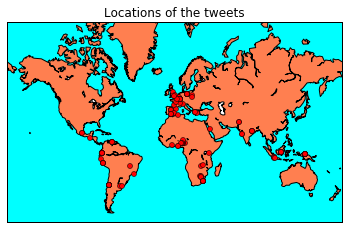

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

geometry = []
for coordinates,row in clean_df.iterrows():
    if row['coordinates']:
        geometry.append(row['coordinates'])

longitude = []
latitude = []
for coordinate in geometry:
    longitude.append(coordinate['coordinates'][0])
    latitude.append(coordinate['coordinates'][1])


# Create a map on which to draw.  We're using a mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.
m.drawcoastlines()
m.fillcontinents(color='coral')

m.drawmapboundary(fill_color='aqua')
# Convert latitude and longitude to x and y coordinates
x, y = m(longitude, latitude)
# Use matplotlib to draw the points onto the map.
m.plot(x, y, 'ro', markersize=5)
plt.title("Locations of the tweets")
# Show the plot.
plt.show()



As we can see from the map, people in Europe, South America and Africa enjoyed the game.  
Next, I show the different language used in tweets. surprisingly, English is only the third language following Spanish and French.

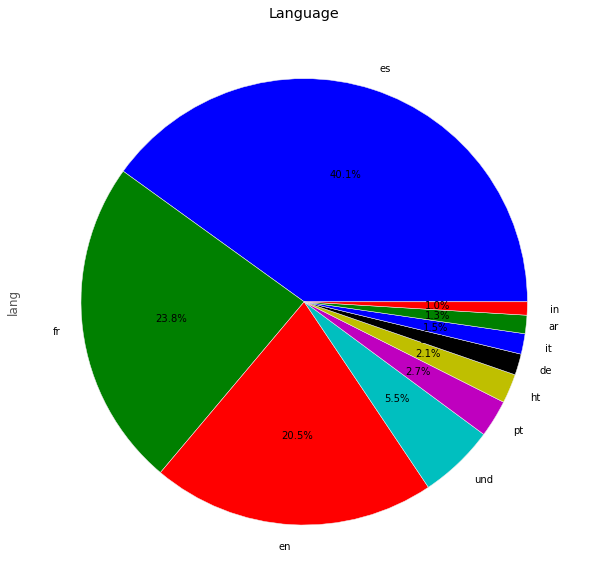

In [60]:
lang_counts = clean_df["lang"].value_counts().head(10)
lang_plot = lang_counts.plot(kind="pie",title="Language",autopct="%.1f%%", figsize=(10, 10))

## Tweet Text Analization
### The frequency of English terms

[('agg', 1127), ('Barcelona', 1103), ('game', 1074), ('Atletico', 1018), ('Messi', 996), ('ça', 976), ('Bar', 969), ('Barca', 931), ('😂', 903), ('Iniesta', 813), ('I', 806), ('Atl', 731), ('box', 719), ('ético', 711), ('goal', 703), ('penalty', 688), ('half', 631), ('The', 618), ('📈', 615), ('counter', 600)]


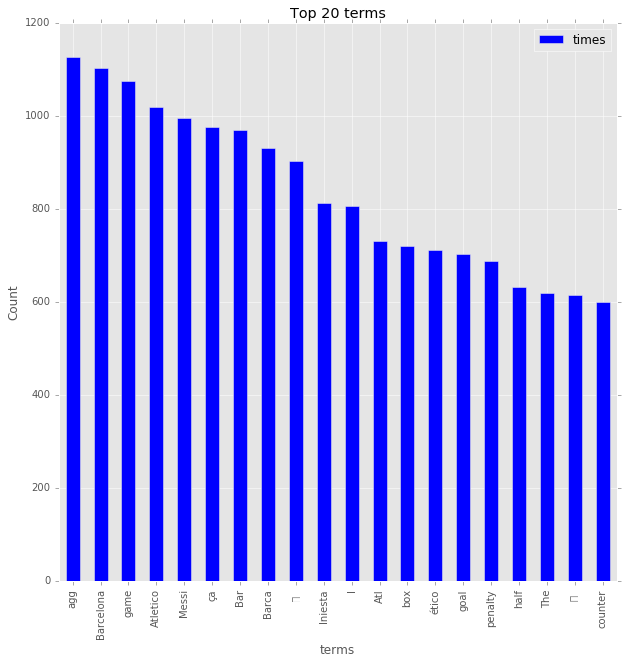

In [313]:
top20_terms = count_en.most_common(20)
print(top20_terms)

top20_terms = pd.DataFrame(data=top20_terms,columns=['terms','times'])
top20_terms = top20_terms.set_index('terms')

top20_terms_plot = top20_terms.plot(kind="bar",title="Top 20 terms", figsize=(10, 10))
top20_terms_plot.set_xlabel("terms")
top20_terms_plot.set_ylabel("Count")

As we can see from the bar plot, 
- the names are the two football clubs are mentioned frequently, like Barcelona, Atletico,Bar, Barca, Atl
- some players who played well or bad are also mentioned many times, like Messi, Iniesta
- some football terms like 'agg', 'penalty' also showed up in those tweets
- although I only select the tweets in English, there are still some Spanish terms. And also interestingly, some Emoji symbols are frequently used by users

### Top 20 hastags and mentions in tweets

[('#AtletiFCB', 76970), ('#UCL', 23355), ('#AúpaAtleti', 14923), ('#FCBlive', 6836), ('#Atleti', 1940), ('#FCBLive', 1667), ('#GoAtleti', 1130), ('#ChampionsLeague', 732), ('#NuncaDejesDeCreer', 702), ('#LDC', 673), ('#Barcelona', 663), ('#Barca', 598), ('#ATMFCB', 556), ('#AupaAtleti', 552), ('#Griezmann', 524), ('#Champions', 444), ('#SLBFCB', 353), ('#TeamBarca', 341), ('#Atle', 331), ('#FCB', 301)]


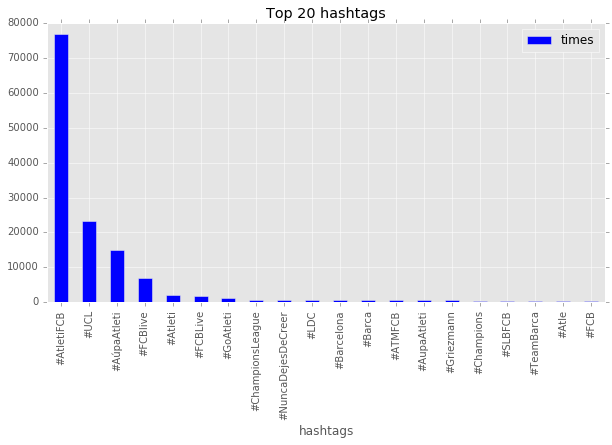

In [315]:
top20_hashtags = count_hashtags.most_common(20)
print(top20_hashtags)

top20_hashtags = pd.DataFrame(data=top20_hashtags,columns=['hashtags','times'])
top20_hashtags_plot = top20_hashtags.plot(kind="bar",title="Top 20 hashtags", x = 'hashtags',figsize=(10, 5))

[('@Atleti', 16847), ('@AntoGriezmann', 8116), ('@FCBarcelona', 7174), ('@WinamaxSport', 1860), ('@atletienglish', 1665), ('@3gerardpique', 1015), ('@FCBarcelona_es', 997), ('@saulniguez', 990), ('@Atletico_MD', 819), ('@9trollfootball', 752), ('@pictoline', 734), ('@infosportplus', 653), ('@Simeone', 646), ('@Nissan_ESP', 560), ('@fcbarcelona_fra', 518), ('@CarrascoY21', 511), ('@AngelCorrea32', 427), ('@btsportfootball', 410), ('@FCBarcelona_cat', 396), ('@nyl2pronos', 374)]


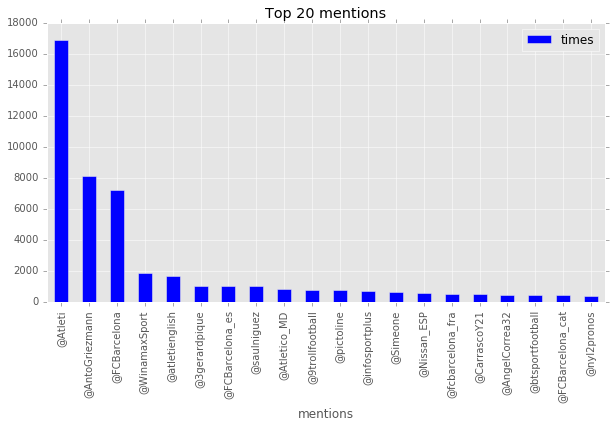

In [316]:
top20_mentions = count_mentions.most_common(20)
print(top20_mentions)

top20_mentions = pd.DataFrame(data=top20_mentions,columns=['mentions','times'])
top20_mentions_plot = top20_mentions.plot(kind="bar",title="Top 20 mentions", x = 'mentions',figsize=(10, 5))

### Top 10 favorited and retweeted tweets

In [319]:

top10_favorited_retweets = retweets_clean.sort_values('favorite_count',ascending = False).head(10)

top10_favorited_count = []
top10_favorited_user = []
top10_favorited_text = []

for index,row in top10_favorited_retweets.iterrows():

    text = row['text']
    count = row['favorite_count']
    user = row['user']['name']
    top10_favorited_text.append(text)
    top10_favorited_count.append(count)
    top10_favorited_user.append(user)

top10_favorited_data = dict(Name=top10_favorited_user,favorited_count=top10_favorited_count,Text=top10_favorited_text)

top10_favorited = pd.DataFrame.from_dict(data = top10_favorited_data)
top10_favorited

,Name,Text,favorited_count
0,Fernando Torres,"Desde dentro o desde fuera, todos juntos para ...",3852
1,Atlético de Madrid,95' | 2-0 | ¡¡¡¡FINAL!!!! ¡¡SE ACABÓ!! ¡Estam...,2915
2,Atlético de Madrid,35' | 1-0 | ¡¡¡GOOOOOOLL!!! ¡@AntoGriezmann de...,2732
3,Atlético de Madrid,87' | 2-0 | ¡¡¡¡¡GOOOOOOOL!!!!! ¡¡Marcó el '7'...,2163
4,FC Barcelona,Barça XI 🔵🔴:\n1.Ter Stegen\n3. Piqué\n4.Rakiti...,2059
5,Fernando Torres,"From inside or outside, all together for this ...",1850
6,FC Barcelona,XI del Barça 🔵🔴:\n1.Ter Stegen\n3. Piqué\n4.Ra...,1661
7,FC Barcelona,#AtletiFCB Messi 👉 👉 👉 ⚽️ #VineFCB #goal\nht...,1169
8,FC Barcelona,⚽️🔵🔴 Força Barça! #FCBLive #AtletiFCB https://...,1135
9,Atlético de Madrid,MOSAICO PARA EL #ATLETIFCB. Ven a las 20:00 h....,1122


In [8]:

top10_retweeted_retweets = retweets_clean.sort_values('retweet_count',ascending = False).head(10)

top10_retweeted_count = []
top10_retweeted_user = []
top10_retweeted_text = []

for index,row in top10_retweeted_retweets.iterrows():

    text = row['text']
    count = row['retweet_count']
    user = row['user']['name']
    top10_retweeted_text.append(text)
    top10_retweeted_count.append(count)
    top10_retweeted_user.append(user)

top10_retweeted_data = dict(Name=top10_retweeted_user,retweet_count=top10_retweeted_count,Text=top10_retweeted_text)

top10_retweeted = pd.DataFrame.from_dict(data = top10_retweeted_data)
top10_retweeted

,Name,Text,retweet_count
0,Atlético de Madrid,95' | 2-0 | ¡¡¡¡FINAL!!!! ¡¡SE ACABÓ!! ¡Estam...,5037
1,Atlético de Madrid,35' | 1-0 | ¡¡¡GOOOOOOLL!!! ¡@AntoGriezmann de...,4319
2,Atlético de Madrid,87' | 2-0 | ¡¡¡¡¡GOOOOOOOL!!!!! ¡¡Marcó el '7'...,3766
3,Fernando Torres,"Desde dentro o desde fuera, todos juntos para ...",3485
4,FC Barcelona,Barça XI 🔵🔴:\n1.Ter Stegen\n3. Piqué\n4.Rakiti...,2809
5,FC Barcelona,XI del Barça 🔵🔴:\n1.Ter Stegen\n3. Piqué\n4.Ra...,2093
6,Atlético de Madrid,¡¡LOS ONCE ELEGIDOS!! Este es nuestro equipo t...,1237
7,WinamaxSport,Ce but de Griezmann ne change rien pour le PSG...,1080
8,Atlético de Madrid,¡¡IMPRESIONANTE!! Así recibió el Calderón a nu...,1067
9,Atlético de Madrid,#UCL. Esta noche buscaremos nuestra quinta pre...,950


**Download the Pictures:**

In [322]:
fig = time_plot.get_figure()
fig.savefig("Number of tweets during the game.png")
fig = lang_plot.get_figure()
fig.savefig("Language.png")
fig = top20_terms_plot.get_figure()
fig.savefig("top20 terms.png")
fig = top20_mentions_plot.get_figure()
fig.savefig("top20 mentions.png")
fig = top20_hashtags_plot.get_figure()
fig.savefig("top20 hashtags.png")
